In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal
import statsmodels.api as sm
import os
import seaborn as sns
sns.set()

In [2]:
rb1=gdal.Open('E:\images\RS project\LC081450452019101401T1-SC20200515155014\LC08_L1TP_145045_20191014_20191018_01_T1_sr_band4.tif')

rb2=rb1.GetRasterBand(1)
rb3=rb2.ReadAsArray()
rb3=rb3[2000:5000,2000:5000]
red=rb3.astype('f4')
red[red==-9999]=np.nan
red.shape

(3000, 3000)

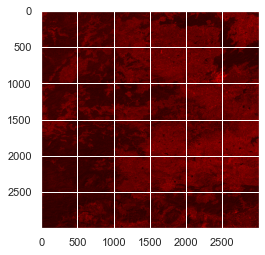

In [3]:
plt.imshow((red),Cmap='hot')

In [4]:
NIR1=gdal.Open('E:\images\RS project\LC081450452019101401T1-SC20200515155014\LC08_L1TP_145045_20191014_20191018_01_T1_sr_band5.tif')
NR=NIR1.GetRasterBand(1)
Nr=NR.ReadAsArray()
Nr=Nr[2000:5000,2000:5000]
Nir=Nr.astype('f4')
Nir[Nir==-9999]=np.nan
Nir.shape

(3000, 3000)

In [5]:
diff=Nir-red
add=Nir+red+1
Ndvi=diff/add

In [6]:
swir=gdal.Open('E:\images\RS project\LC081450452019101401T1-SC20200515155014\LC08_L1TP_145045_20191014_20191018_01_T1_sr_band7.tif')
sw=swir.GetRasterBand(1)
Swir=sw.ReadAsArray()
Swir=Swir[2000:5000,2000:5000]
swir1=Swir.astype("f4")
swir1[swir1==-9999]=np.nan
swir=swir1*.0001

In [7]:
srt=((1-swir)**2)/(2*swir)

In [8]:
Ndvi=np.reshape(Ndvi,-1)
srt=np.reshape(srt,-1)
swir=np.reshape(swir,-1)

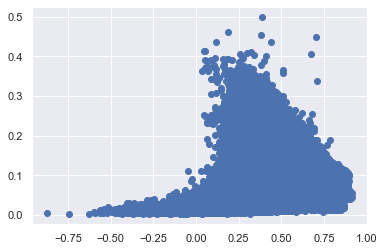

In [9]:
plt.scatter(Ndvi,swir)

In [10]:
data=pd.DataFrame({"ndvi":Ndvi,'srt':srt})
data1=data.round({'ndvi':2})
a=0.001
sorttop=(data1.sort_values(by='srt',ascending=False).groupby('ndvi',group_keys=False).apply(lambda x:x.head(int(len(x)*a))))
datatop=sorttop.sort_values(by='ndvi',ascending=True)
datatop.describe()

,ndvi,srt
count,8944.000000,8944.000000
mean,0.723109,15.616793
std,0.107084,9.595594
min,-0.100000,9.729988
25%,0.670000,11.215623
50%,0.750000,12.568586
75%,0.800000,16.255880
max,0.870000,155.251602


In [11]:
data1.describe()

,ndvi,srt
count,9.000000e+06,9.000000e+06
mean,7.340644e-01,4.825028e+00
std,1.152658e-01,4.402031e+00
min,-8.700000e-01,2.504504e-01
25%,6.700000e-01,3.532126e+00
50%,7.500000e-01,4.434331e+00
75%,8.000000e-01,5.424846e+00
max,9.100000e-01,3.115008e+02


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  This is separate from the ipykernel package so we can avoid doing imports until


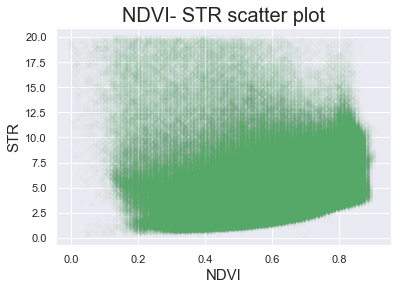

In [12]:
data3=data1[(data1['ndvi']>=0) & (data1['ndvi']<=1)]
data3=data3[(data3['srt']<20)]
plt.scatter(data3['ndvi'],data3['srt'],c='G',marker='x',alpha=0.02,edgecolors='none')
plt.title("NDVI- STR scatter plot",fontsize=20)
plt.xlabel("NDVI",fontsize=15)
plt.ylabel("STR",fontsize=15)
plt.savefig("E:\\NDVI-STR.jpg")

In [13]:
data3['srt'].max(),data3['srt'].min()

(19.932453155517578, 0.2504504323005676)

In [14]:
data3.describe()

,ndvi,srt
count,8.940364e+06,8.940364e+06
mean,7.384765e-01,4.515056e+00
std,1.011407e-01,1.436226e+00
min,-0.000000e+00,2.504504e-01
25%,6.700000e-01,3.528172e+00
50%,7.500000e-01,4.422844e+00
75%,8.000000e-01,5.408677e+00
max,9.100000e-01,1.993245e+01


In [15]:
sorttop=data3.sort_values(by='srt',ascending=False).drop_duplicates('ndvi',keep='first')       
datatop=sorttop.sort_values(by='ndvi',ascending=True)

sortbottom=data3.sort_values(by='srt',ascending=False).drop_duplicates('ndvi',keep='last')
databottom=sortbottom.sort_values(by='ndvi',ascending=True)

In [16]:
datatop.describe()

,ndvi,srt
count,92.000000,92.000000
mean,0.455000,19.437305
std,0.267021,1.797515
min,-0.000000,10.676461
25%,0.227500,19.758938
50%,0.455000,19.932453
75%,0.682500,19.932453
max,0.910000,19.932453


In [17]:
x1=datatop['ndvi']
y=datatop['srt']
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
print('TOP VALUES OF NDVI REGRESSION\n\n' ,results.summary())

TOP VALUES OF NDVI REGRESSION

                             OLS Regression Results                            
Dep. Variable:                    srt   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     15.15
Date:                Fri, 29 May 2020   Prob (F-statistic):           0.000190
Time:                        23:53:25   Log-Likelihood:                -176.83
No. Observations:                  92   AIC:                             357.7
Df Residuals:                      90   BIC:                             362.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.600

In [18]:
sw=-2.5555
iw=20.6001
wet_edge=sw*x1+iw

In [19]:
x2=databottom['ndvi']
y=databottom['srt']
x=sm.add_constant(x2)
results=sm.OLS(y,x).fit()
print('BOTTOM VALUES OF NDVI REGRESSION\n\n' ,results.summary())

BOTTOM VALUES OF NDVI REGRESSION

                             OLS Regression Results                            
Dep. Variable:                    srt   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     6.063
Date:                Fri, 29 May 2020   Prob (F-statistic):             0.0157
Time:                        23:53:26   Log-Likelihood:                -174.36
No. Observations:                  92   AIC:                             352.7
Df Residuals:                      90   BIC:                             357.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.

In [20]:
sd=1.5737
idd=0.7721
dry_edge=sd*x1+idd

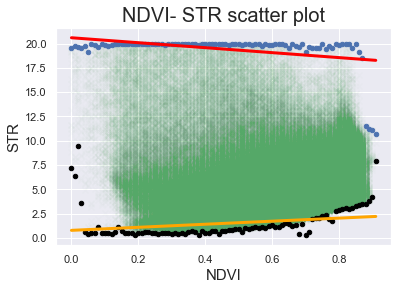

In [21]:
plt.scatter(data3['ndvi'],data3['srt'],c='G',marker='x',alpha=0.02,edgecolors='none')
plt.scatter(datatop['ndvi'],datatop['srt'], s=20)
plt.scatter(databottom['ndvi'],databottom['srt'],c='black', s=20)
plt.plot(x2,dry_edge,c='orange',lw=3)
plt.plot(x1,wet_edge,c='red',lw=3)
plt.title("NDVI- STR scatter plot",fontsize=20)
plt.xlabel("NDVI",fontsize=15)
plt.ylabel("STR",fontsize=15)
plt.savefig("E:\\regression_plot.jpg")

plt.show()

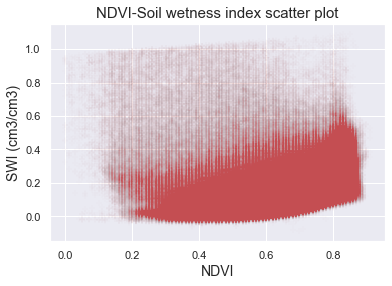

In [22]:
w1=idd+sd*data3['ndvi']-data3['srt']
w2=idd-iw+(sd-sw)*data3['ndvi']
w=w1/w2
plt.scatter(data3['ndvi'],w,c='r',alpha=0.01,marker='+',edgecolors='none')
plt.title("NDVI-Soil wetness index scatter plot",fontsize=15)
plt.xlabel("NDVI",fontsize=14)
plt.ylabel("SWI (cm3/cm3)",fontsize=14)
plt.savefig("E:\\NDVI-SWI.jpg")
plt.show()

In [23]:
ndvi=data3['ndvi']
ndvi=np.array(ndvi)
n1=3000*3000-len(ndvi)
ndvi=np.pad(ndvi,(0,n1),'constant')
nd=ndvi.reshape(3000,3000)
w=w.astype('f4')
w=np.array(w)
w=np.pad(w,(0,n1),'constant')
w1=w.reshape(3000,3000)


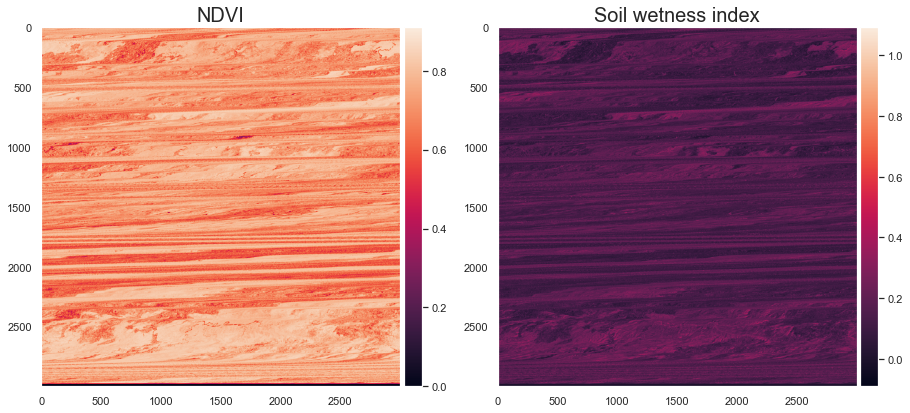

In [24]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig=plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
a = fig.add_subplot(1, 2, 1)
a.grid(False)
imgplot = plt.imshow(nd)
a.set_title('NDVI',fontsize=20)
divider = make_axes_locatable(a)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(imgplot, cax=cax)

a = fig.add_subplot(1, 2, 2)
a.grid(False)
imgplot = plt.imshow(w1)
a.set_title('Soil wetness index',fontsize=20)
divider = make_axes_locatable(a)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(imgplot, cax=cax)
plt.savefig("E:\\NDVI-SWI LAYOUT.jpg")